In [70]:
from pymongo import MongoClient
from bson.objectid import ObjectId
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
client=MongoClient('');
db=client.PyData

In [71]:
data={}
NoOfPerson=[]
Price=[]
DaysBooking=[]
HotelStar=[]
Age=[]
Booked=[]

for i in db.Dataset1.find({}):
    NoOfPerson.append(i['NoOfPerson'])
    Price.append(i['Price'])
    HotelStar.append(i['HotelStar'])
    Age.append(i['Age'])
    Booked.append(i['Booked'])
    DaysBooking.append(i['DaysBooking'])


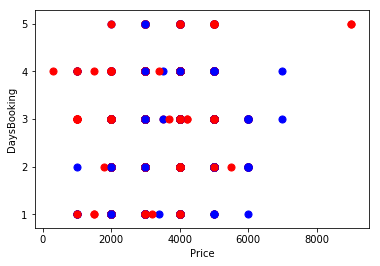

In [72]:
plt.xlabel('Price')
plt.ylabel('DaysBooking')

for i in range(0,len(Price)):
    if(Booked[i]==1):
        col='r'    
        plt.scatter(Price[i],DaysBooking[i],s=50,color=col)
    else:
        col='b'
        plt.scatter(Price[i],DaysBooking[i],s=50,color=col)
plt.show()    

In [73]:
train_set={1:[],0:[]}
for i in range(0,len(Booked)):
    data=[DaysBooking[i],Price[i]]
    train_set[Booked[i]].append(data)
print(train_set[1])    

[[2, 2000], [4, 4000], [2, 4000], [4, 4000], [3, 2000], [4, 3000], [3, 3000], [3, 4000], [3, 4000], [3, 2000], [3, 4000], [4, 3000], [2, 4000], [2, 2000], [3, 4000], [4, 2000], [2, 4000], [2, 4000], [3, 5000], [1, 3000], [2, 5000], [2, 5000], [1, 2000], [2, 4000], [3, 5000], [1, 2000], [2, 6000], [3, 4000], [2, 5000], [3, 5000], [3, 2000], [5, 5000], [4, 5000], [4, 2000], [3, 5000], [3, 6000], [2, 3000], [3, 5000], [1, 2000], [3, 4000], [4, 4000], [5, 3000], [4, 5000], [5, 4000], [4, 3000], [3, 4000], [2, 3000], [3, 4000], [4, 4000], [5, 3000], [3, 1000], [5, 3000], [2, 2000], [4, 4000], [3, 2000], [2, 4000], [4, 4000], [2, 3000], [4, 5000], [2, 2000], [3, 4000], [4, 3000], [2, 3000], [4, 4000], [1, 4000], [2, 3000], [5, 5000], [3, 5000], [3, 5000], [3, 4000], [4, 5000], [2, 2000], [1, 1000], [2, 5000], [4, 3000], [4, 3000], [3, 4000], [3, 4000], [1, 3000], [2, 4000], [2, 3000], [3, 3000], [2, 5000], [4, 3000], [1, 2000], [3, 3000], [4, 3000], [1, 2000], [4, 4000], [1, 4000], [2, 4000]

In [74]:
def k_nearest_neighbours(train_set,data,k=3):
    if len(data)>=k:
        warnings.warn('K is set to a value less than voting groups')
    distances=[]
    for label in train_set:
        for features in train_set[label]:
            euclidian_distance=np.linalg.norm(np.array(features)-np.array(data))
            distances.append([euclidian_distance,label])
    votes=[i[1] for i in sorted(distances)[:k]]
        
    vote_result=Counter(votes).most_common(1)[0][0]
    return vote_result   

In [75]:
k_nearest_neighbours(train_set,[3,4200],3)

1

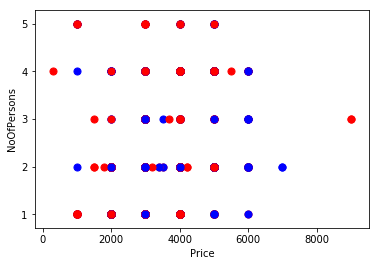

In [76]:
plt.xlabel('Price')
plt.ylabel('NoOfPersons')

for i in range(0,len(Price)):
    if(Booked[i]==1):
        col='r'    
        plt.scatter(Price[i],NoOfPerson[i],s=50,color=col)
    else:
        col='b'
        plt.scatter(Price[i],NoOfPerson[i],s=50,color=col)
plt.show()    

In [77]:
train_set={1:[],0:[]}
for i in range(0,len(Booked)):
    data=[NoOfPerson[i],Price[i]]
    train_set[Booked[i]].append(data)
k_nearest_neighbours(train_set,[2,1500],3)

1

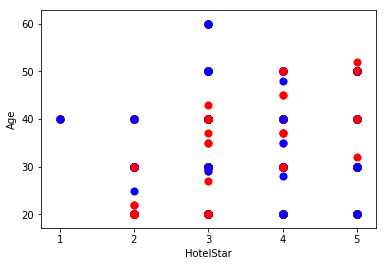

In [80]:
plt.xlabel('HotelStar')
plt.ylabel('Age')

for i in range(0,len(Price)):
    if(Booked[i]==1):
        col='r'    
        plt.scatter(HotelStar[i],Age[i],s=50,color=col)
    else:
        col='b'
        plt.scatter(HotelStar[i],Age[i],s=50,color=col)
plt.show()




In [88]:
train_set={1:[],0:[]}
for i in range(0,len(Booked)):
    data=[HotelStar[i],Age[i]]
    train_set[Booked[i]].append(data)
k_nearest_neighbours(train_set,[3,35],5)

1